In [110]:
library(igraph)
source('/gpfs/oe-scrna/liuchenglong/RaD/pyscenic/pySCENIC_pipeline/scripts/script/netplot/tools/utils.r')

In [132]:
input = '/gpfs/oe-scrna/liuchenglong/RaD/pyscenic/pySCENIC_pipeline/test1/pyscenic_testtss-centered-10kb-10species.mc9nr.genes_vs_motifs.rankings.feather/data/expr_mat.adjacencies.tsv'
outdir = '/gpfs/oe-scrna/liuchenglong/RaD/pyscenic/pySCENIC_pipeline/scripts/script/netplot'
topN = 30

TFColor = '#1E90FF'

highTarget = 'no'
showTarget = 0.5
highTargetSize = 3
highTargetColor = '#00AA55'
targetColor = '#E87D72'

edgeColor = '#00CED1'

vertexLabelSize = 0.8

legend = 'T'

layouts = 'layout_nicely' # layout_with_lgl,layout_with_kk,layout_with_fr,layout_with_dh,layout_nicely,layout_components

In [112]:
data = read.delim(regulons_path)

In [133]:
colnames(data)

[1] "TF"         "target"     "importance"

In [134]:
head(data)

,TF,target,importance
,<chr>,<chr>,<dbl>
1,RPL6,RPS27,13.76786
2,ZSCAN20,AC004784.1,13.19524
3,RPS4X,TPT1,12.80304
4,RPL35,RPS27,12.19948
5,ZSCAN5C,AL451048.1,11.63729
6,ZSCAN22,AC073987.1,11.45684


In [135]:
TFs = head(unique(df$TF),3)

In [136]:
edge_df = do.call(rbind, lapply(TFs, process_tf, df = data, top = topN))

In [137]:
all_genes = unique(c(edge_df$target, edge_df$TF))

In [138]:
show_labels = c(TFs, if(highTarget != 'no') highTarget, edge_df$target[seq_len(round(topN * showTarget))])


In [139]:
vertex_df <- data.frame(
  name = all_genes,
  label = ifelse(all_genes %in% show_labels, all_genes, ""),
  size = ifelse(all_genes %in% TFs, 10,
               ifelse(all_genes %in% highTarget, highTargetSize,
                     ifelse(all_genes %in% show_labels, 3, 1))),
  color = ifelse(all_genes %in% TFs, TFColor,
                ifelse(all_genes %in% highTarget, highTargetColor,
                      ifelse(all_genes %in% show_labels, targetColor, "#FFFFFF")))
)

In [140]:
write.csv(edge_df, paste0(outdir,"/edge.csv"), row.names = FALSE)
write.csv(vertex_df, paste0(outdir,"/vertex.csv"), row.names = FALSE)

In [141]:
net_pc<-graph_from_data_frame(edge_df, directed=TRUE, vertices = vertex_df)

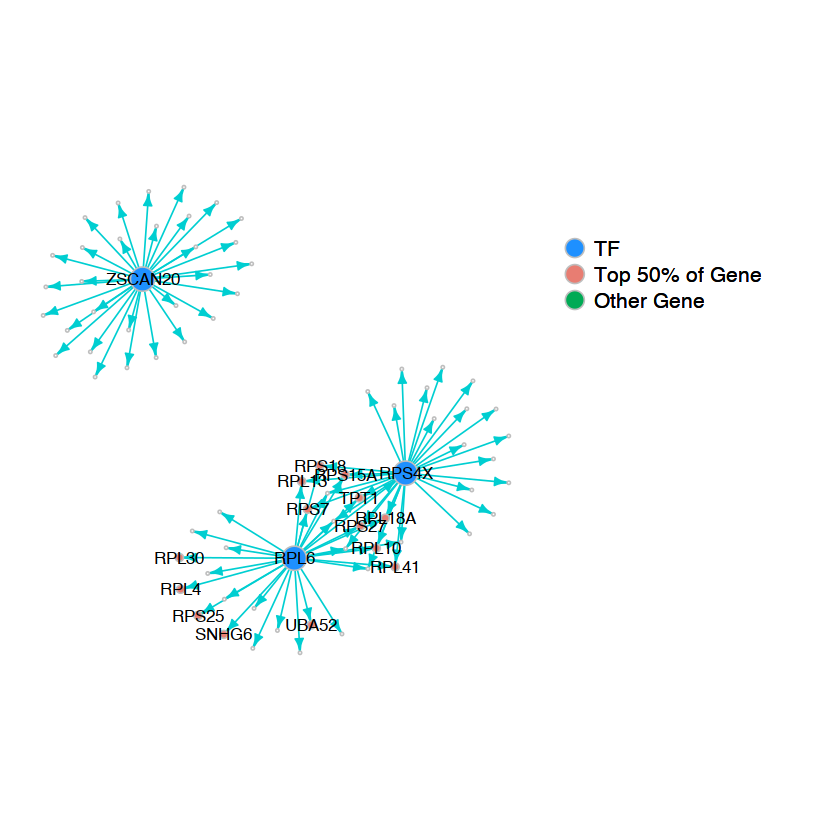

In [142]:
net_plot(vertex.label.cex=vertexLabelSize,
    edge.color=edgeColor,
    edge = edge_df,
    vertex = vertex_df,
    vertex.size = vertex_df$size,
    vertex.color  = vertex_df$color,
    layout = layouts,
    legend.vertex.label = c('TF',paste0('Top ',showTarget*100,'% of Gene'),'Other Gene'),
    legend.vertex.color = c(TFColor,targetColor,highTargetColor,"#FFFFFF")
)